## Analisando a correlação entres minhas notas e minha faltas na faculdade

--------------------------------------------------------------------------------------------------------------------------------------

In [18]:
import pandas as pd
import seaborn as sns
import math
from typing import Dict, Tuple

Notas = float
Faltas = int
Aulas = str

### 1) Criando um dataframe com minhas aulas, notas e faltas 

In [19]:
notasefaltas: Dict[Aulas, Tuple[Notas, Faltas]] = {
    "Identidade profissional": (8.5, 0), "Introdução à programação": (10.0, 4),
    "Lógica computacional": (8.0, 0), "Desenho técnico": (7.5, 2),
    "CTS": (10.0, 4), "Megaclass": (9.0, 0), 
    "Cosmovisão": (8.5, 2), "IHC": (9.0, 1),
    "Cálculo I": (7.5, 6), "Antropologia": (9.5, 5),
    "Algoritmos e programação": (8.0, 8), "Inglês instrumental": (9.0, 0),
    "LPT": (6.5, 6)
    }

In [14]:
df = pd.DataFrame(notasefaltas.values()).transpose()
df.loc[2] = notasefaltas.keys()
df.iloc[[0, 2]] = df.iloc[[2, 0]].values
df.iloc[[1, 2]] = df.iloc[[2, 1]].values
df = df.transpose()
df.columns = ["Matérias", "Notas", "Faltas"]
df

,Matérias,Notas,Faltas
0,Identidade profissional,8.5,0.0
1,Introdução à programação,10.0,4.0
2,Lógica computacional,8.0,0.0
3,Desenho técnico,7.5,2.0
4,CTS,10.0,4.0
5,Megaclass,9.0,0.0
6,Cosmovisão,8.5,2.0
7,IHC,9.0,1.0
8,Cálculo I,7.5,6.0
9,Antropologia,9.5,5.0


### 2) Analisando se há correlação entre as minhas notas e minhas faltas

In [15]:
# Funções do capítulo de estatística
def desvio_padrao(lista: list) -> float:
    """Calcula o desvio padrão"""
    media = sum(lista) / len(lista)
    a = [i - media for i in lista]
    b = sum([i**2 for i in a]) / len(lista)
    return math.sqrt(b)

def desvio_media(xs: list[float]) -> list[float]:
    """Traduza xs subtraindo sua média (para que o resultado tenha média 0)"""
    xs_bar = sum(xs)/len(xs)
    return [x - xs_bar for x in xs]

def dot(v, w) -> float:
    """Calcula o produto de dois vetores, v_1 * w_1 + v_2 * w_2..."""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def covariance(xs: list[float], ys: list[float]) -> float:
    assert len(xs) == len(ys), 'as listas devem ter o mesmo tamnho'

    return dot(desvio_media(xs), desvio_media(ys)) / (len(xs) - 1)

def correlacao(xs: list[float], ys: list[float]) -> float:
    """Mede a variação simultânea de xs e ys a partir de suas médias"""

    stdev_x = desvio_padrao(xs)
    stdev_y = desvio_padrao(ys)

    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0 # se não houver variação, a correlção será zero

In [16]:
# Analisando a correlção entre as notas e as faltas

correlacao(df["Notas"], df["Faltas"])

-0.25350978020301224

#### A correlação foi de -0.25350978020301224, indicando que notas e faltas estão indiretamentes relacionadas e que a correlação entre elas é fraca.

### 3) Plotando minhas notas e faltas

<Axes: xlabel='Notas', ylabel='Faltas'>

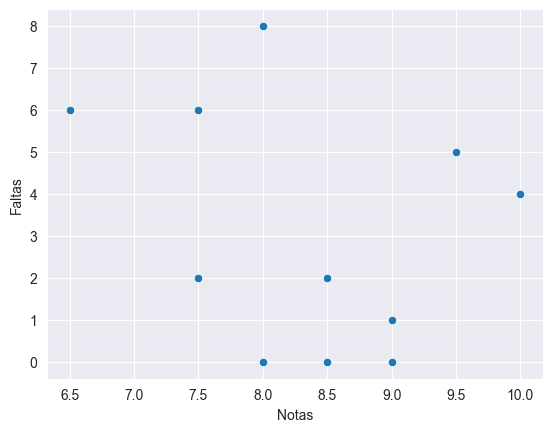

In [17]:
sns.set_style("darkgrid")
sns.scatterplot(data=df, x="Notas", y="Faltas")